In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [3]:
# Confirmed cases and Death rates
Original_Confirmed = pd.read_csv("/content/gdrive/MyDrive/College/CS/CS506/COVID_Insurance_Relation/Data/time_series_covid19_confirmed_US.csv")
# (3340, 435)
Original_Deaths = pd.read_csv("/content/gdrive/MyDrive/College/CS/CS506/COVID_Insurance_Relation/Data/time_series_covid19_deaths_US.csv")
# (3340, 436)

# Insurance
US_Insurance = pd.read_csv("/content/gdrive/MyDrive/College/CS/CS506/COVID_Insurance_Relation/Data/SAHIE_21MAR21_16_03_44_68.csv")
 
# Feature extraction
US_Confirmed = Original_Confirmed.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Combined_Key'])
US_Deaths = Original_Deaths.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Combined_Key', ]) 
US_Insurance = US_Insurance.drop(columns=['Age Category', 'Income Category', 'Race Category', 'Sex Category', 'Year', 'ID', 'Demographic Group: MOE', 'Uninsured: %', 'Uninsured: %MOE', 'Insured: %MOE'])

In [4]:
# fill NaN with median values
US_Confirmed = US_Confirmed.dropna()
US_Deaths = US_Deaths.dropna()

# drop places w no latitude/not on map
US_Confirmed = US_Confirmed.loc[(US_Confirmed['Lat'] != 0)]
US_Deaths = US_Confirmed.loc[(US_Confirmed['Lat'] != 0)]


stateNames = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", 
              "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", 
              "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", 
              "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", 
              "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"] 

# removing unassigned data
drop_data = ["Unassigned", "Out of", "Dukes and Nantucket", "Kansas City", "Bear River", "Central Utah", "Southeast Utah", "Southwest Utah", "TriCounty", "Weber-Morgan"] # drop all these "counties"
drop_states = ["American Samoa", "Guam", "Northern Mariana Islands", "Puerto Rico", "Virgin Islands", "Diamond Princess"]

drop_i = []
for i, row in US_Confirmed.iterrows():
  # drop Provinces
  if row['Province_State'] in drop_states:
    drop_i.append(i)
  # drop unassigned/out of state data
  else:
    for d in drop_data:
      if d in str(row['Admin2']):
        drop_i.append(i)

# drop these row indices from dataFrames
US_Confirmed.drop(drop_i, inplace = True)
US_Deaths.drop(drop_i, inplace = True)

# Sum county data for state stats
State_Confirmed = []
State_Death = []
Covid_Counties = [] # temp
for i in stateNames:
  State_Confirmed.append(US_Confirmed.loc[US_Confirmed['Province_State'] == i, '3/20/21'].sum())
  State_Death.append(US_Deaths.loc[US_Deaths['Province_State'] == i, '3/20/21'].sum())
  Covid_Counties.append(US_Confirmed.loc[US_Confirmed['Province_State'] == i, 'Admin2']) # temp

  

In [5]:

# fill NaN with median values
US_Insurance['Insured: Number'] = US_Insurance.fillna(US_Insurance.median())
print(US_Insurance[545:550])

# seperating state data from dataset
states_i = []
for i, row in US_Insurance.iterrows():
  if row['Name'] in stateNames:
    # DC duplicated, keep one as a county and one as a state
    if row['Name'] != "District of Columbia" or (i != states_i[-1] + 1):
      states_i.append(i)

# save state data
State_Insurance = US_Insurance.iloc[states_i]



# splitting counties by state
states_i.append(len(US_Insurance))
Insurance_Counties = []
for i in range(len(states_i) - 1):
  Insurance_Counties.append(US_Insurance.loc[states_i[i] + 1: states_i[i + 1] - 1, 'Name'])

#for i in range(len(Insurance_Counties)):
#  if len(Covid_Counties[i]) != len(Insurance_Counties[i]):
#    print(len(Covid_Counties[i]), ", ", len(Insurance_Counties[i]))
#    print((Covid_Counties[i], Insurance_Counties[i]))





# drop these row indexes from dataFrame 
US_Insurance.drop(states_i[:-1], inplace = True) 

print(len(US_Insurance)) # 3140
print(len(US_Confirmed)) # 3150
print(len(US_Deaths))
print(US_Confirmed['Admin2'][50:55])
#print(US_Insurance['Name'][1245:1250])


 


                      Name Demographic Group: Number  ... Insured: MOE Insured: %
545        Ware County, GA                    27,190  ...          432       84.4
546      Warren County, GA                     3,980  ...           71       85.0
547  Washington County, GA                    14,945  ...          246       85.0
548       Wayne County, GA                    23,102  ...          373       82.5
549     Webster County, GA                     1,972  ...           36       84.2

[5 rows x 7 columns]
3142
3142
3142
50    Montgomery
51        Morgan
53         Perry
54       Pickens
55          Pike
Name: Admin2, dtype: object


In [ ]:
print("max", State_Insurance['Insured: Number'].max())
print("min", State_Insurance['Insured: Number'].min())

max 930,499
min 1,002,810


## States Scatter Plots

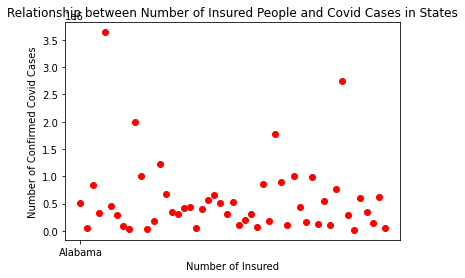

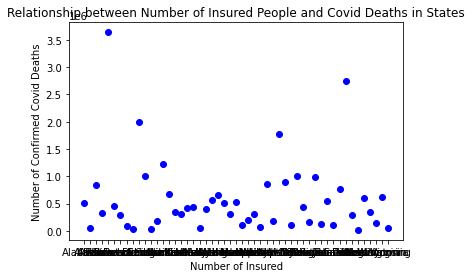

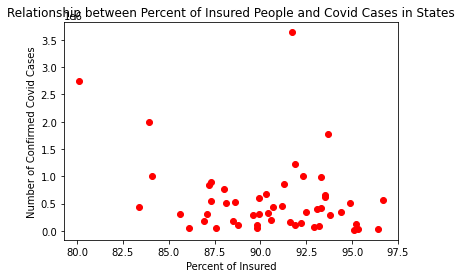

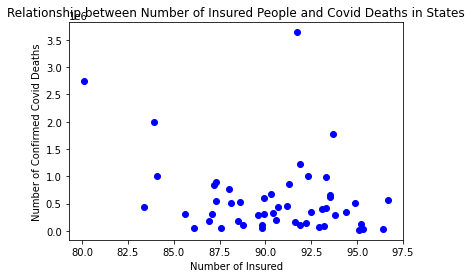

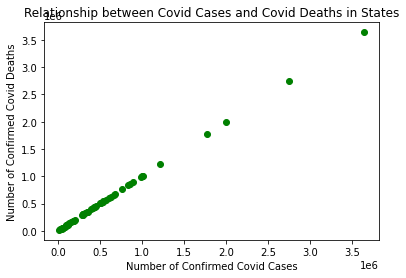

In [10]:
# x-axis: # insured, y-axis: confirmed cases
plt.scatter(State_Insurance['Insured: Number'], State_Confirmed, c = 'r')
plt.xlabel('Number of Insured')
plt.xticks(np.arange(0, 100000, 100000))
plt.ylabel('Number of Confirmed Covid Cases')
plt.title("Relationship between Number of Insured People and Covid Cases in States")
plt.show()

# x-axis: # insured, y-axis: deaths
plt.scatter(State_Insurance['Insured: Number'], State_Death, c='b')
plt.xlabel('Number of Insured')
plt.ylabel('Number of Confirmed Covid Deaths')
plt.title("Relationship between Number of Insured People and Covid Deaths in States")
plt.show()

# x-axis: % insured, y-axis: confirmed cases
plt.scatter(State_Insurance['Insured: %'], State_Confirmed, c='r')
plt.xlabel('Percent of Insured')
plt.ylabel('Number of Confirmed Covid Cases')
plt.title("Relationship between Percent of Insured People and Covid Cases in States")
plt.show()

# x-axis: % insured, y-axis: deaths
plt.scatter(State_Insurance['Insured: %'], State_Death, c='b')
plt.xlabel('Number of Insured')
plt.ylabel('Number of Confirmed Covid Deaths')
plt.title("Relationship between Number of Insured People and Covid Deaths in States")
plt.show()

# x-axis: confirmed cases, y-axis: deaths
plt.scatter(State_Confirmed, State_Death, c='g')
plt.xlabel('Number of Confirmed Covid Cases')
plt.ylabel('Number of Confirmed Covid Deaths')
plt.title("Relationship between Covid Cases and Covid Deaths in States")
plt.show()
 
# bar graph: state and confirmed cases / death rates

## Counties Scatter Plots

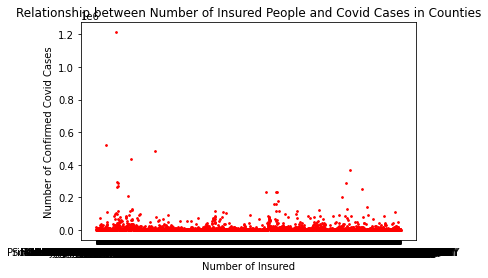

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


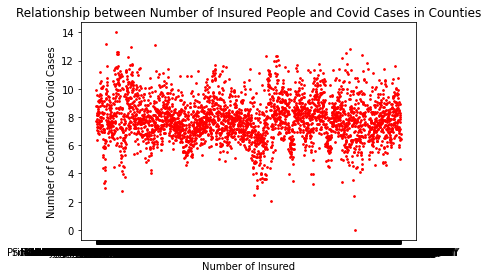

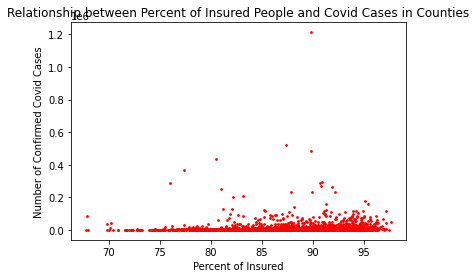

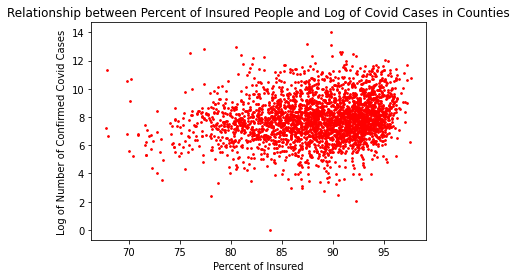

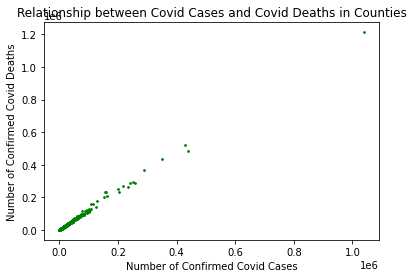

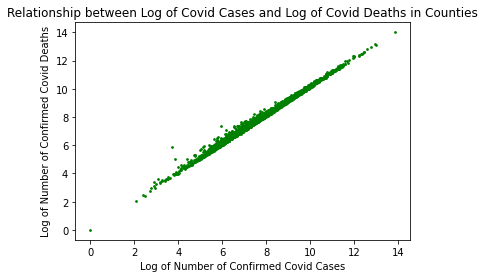

In [15]:
# x-axis: # insured, y-axis: confirmed cases
plt.scatter(US_Insurance['Insured: Number'], US_Confirmed['3/20/21'], s=3, c = 'r')
plt.xlabel('Number of Insured')
plt.ylabel('Number of Confirmed Covid Cases')
plt.title("Relationship between Number of Insured People and Covid Cases in Counties")
plt.show()

# x-axis: # insured, y-axis: confirmed cases
plt.scatter(US_Insurance['Insured: Number'], np.log(US_Confirmed['3/20/21']), s=3, c = 'r')
plt.xlabel('Number of Insured')
plt.ylabel('Log of Number of Confirmed Covid Cases')
plt.title("Relationship between Number of Insured People and Log of Covid Cases in Counties")
plt.show()

# x-axis: % insured, y-axis: confirmed cases
plt.scatter(US_Insurance['Insured: %'], US_Confirmed['3/20/21'], s=3, c='r')
plt.xlabel('Percent of Insured')
plt.ylabel('Number of Confirmed Covid Cases')
plt.title("Relationship between Percent of Insured People and Covid Cases in Counties")
plt.show()

# x-axis: % insured, y-axis: confirmed cases
plt.scatter(US_Insurance['Insured: %'], np.log(US_Confirmed['3/20/21']), s=3, c='r')
plt.xlabel('Percent of Insured')
plt.ylabel('Log of Number of Confirmed Covid Cases')
plt.title("Relationship between Percent of Insured People and Log of Covid Cases in Counties")
plt.show()


# x-axis: confirmed cases, y-axis: deaths
plt.scatter(US_Confirmed['1/20/21'], US_Deaths['3/20/21'], s=3, c='g')
plt.xlabel('Number of Confirmed Covid Cases')
plt.ylabel('Number of Confirmed Covid Deaths')
plt.title("Relationship between Covid Cases and Covid Deaths in Counties")
plt.show()

# x-axis: confirmed cases, y-axis: deaths
plt.scatter(np.log(US_Confirmed['1/20/21']), np.log(US_Deaths['3/20/21']), s=3, c='g')
plt.xlabel('Log of Number of Confirmed Covid Cases')
plt.ylabel('Log of Number of Confirmed Covid Deaths')
plt.title("Relationship between Log of Covid Cases and Log of Covid Deaths in Counties")
plt.show()


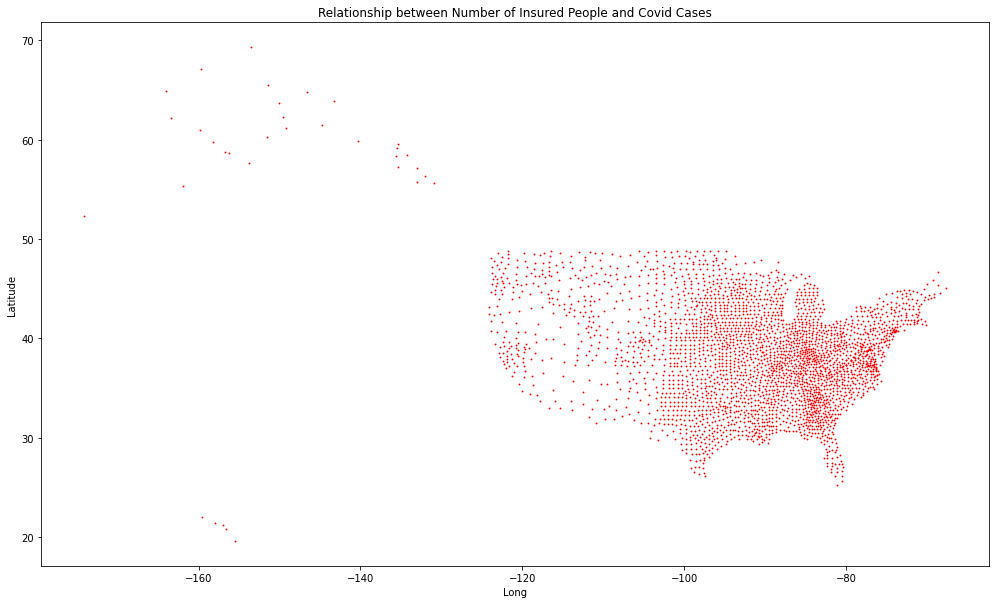

In [12]:
# x-axis: # insured, y-axis: confirmed cases
plt.figure(figsize=(17, 10))
plt.scatter(US_Confirmed['Long_'], US_Confirmed['Lat'], s = 3, c = 'r', marker = ".")
plt.xlabel('Long')
plt.ylabel('Latitude')
plt.title("Relationship between Number of Insured People and Covid Cases")
plt.show()